C:\Users\杨怡鹤\AppData\Local\Temp\ipykernel_3136\663034047.py:12: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=resolution)


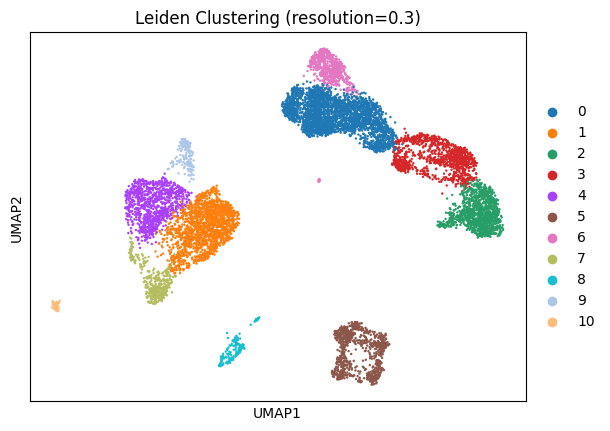

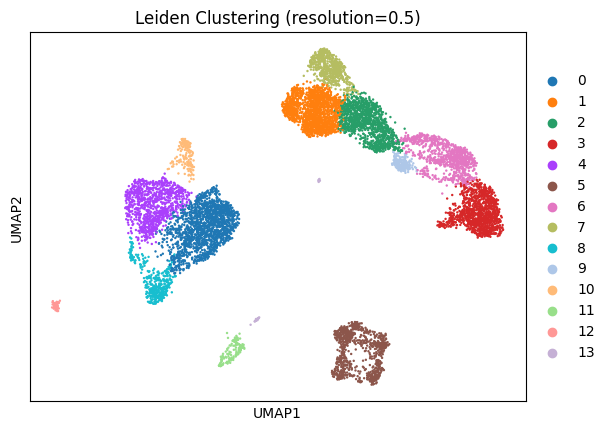

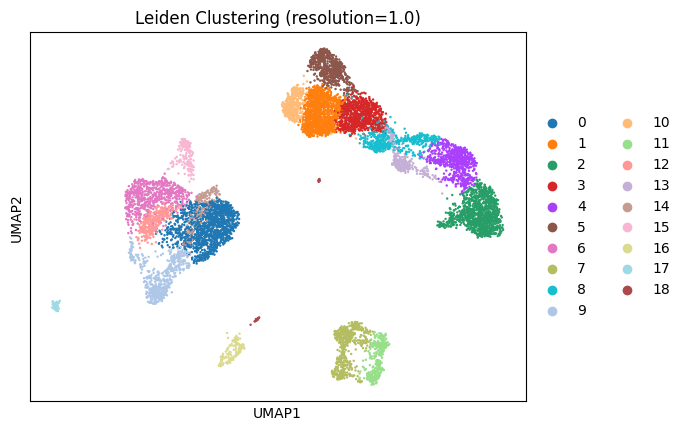

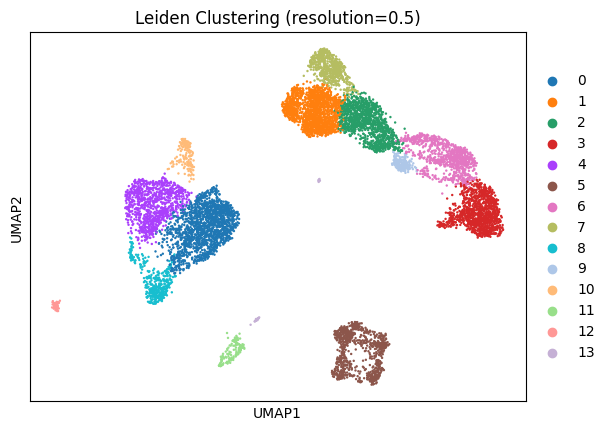

leiden
0     1663
1     1637
2     1222
3     1141
4      958
5      918
6      883
7      616
8      384
9      188
10     153
11     139
12      64
13      34
Name: count, dtype: int64


d:\Miniconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:479: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


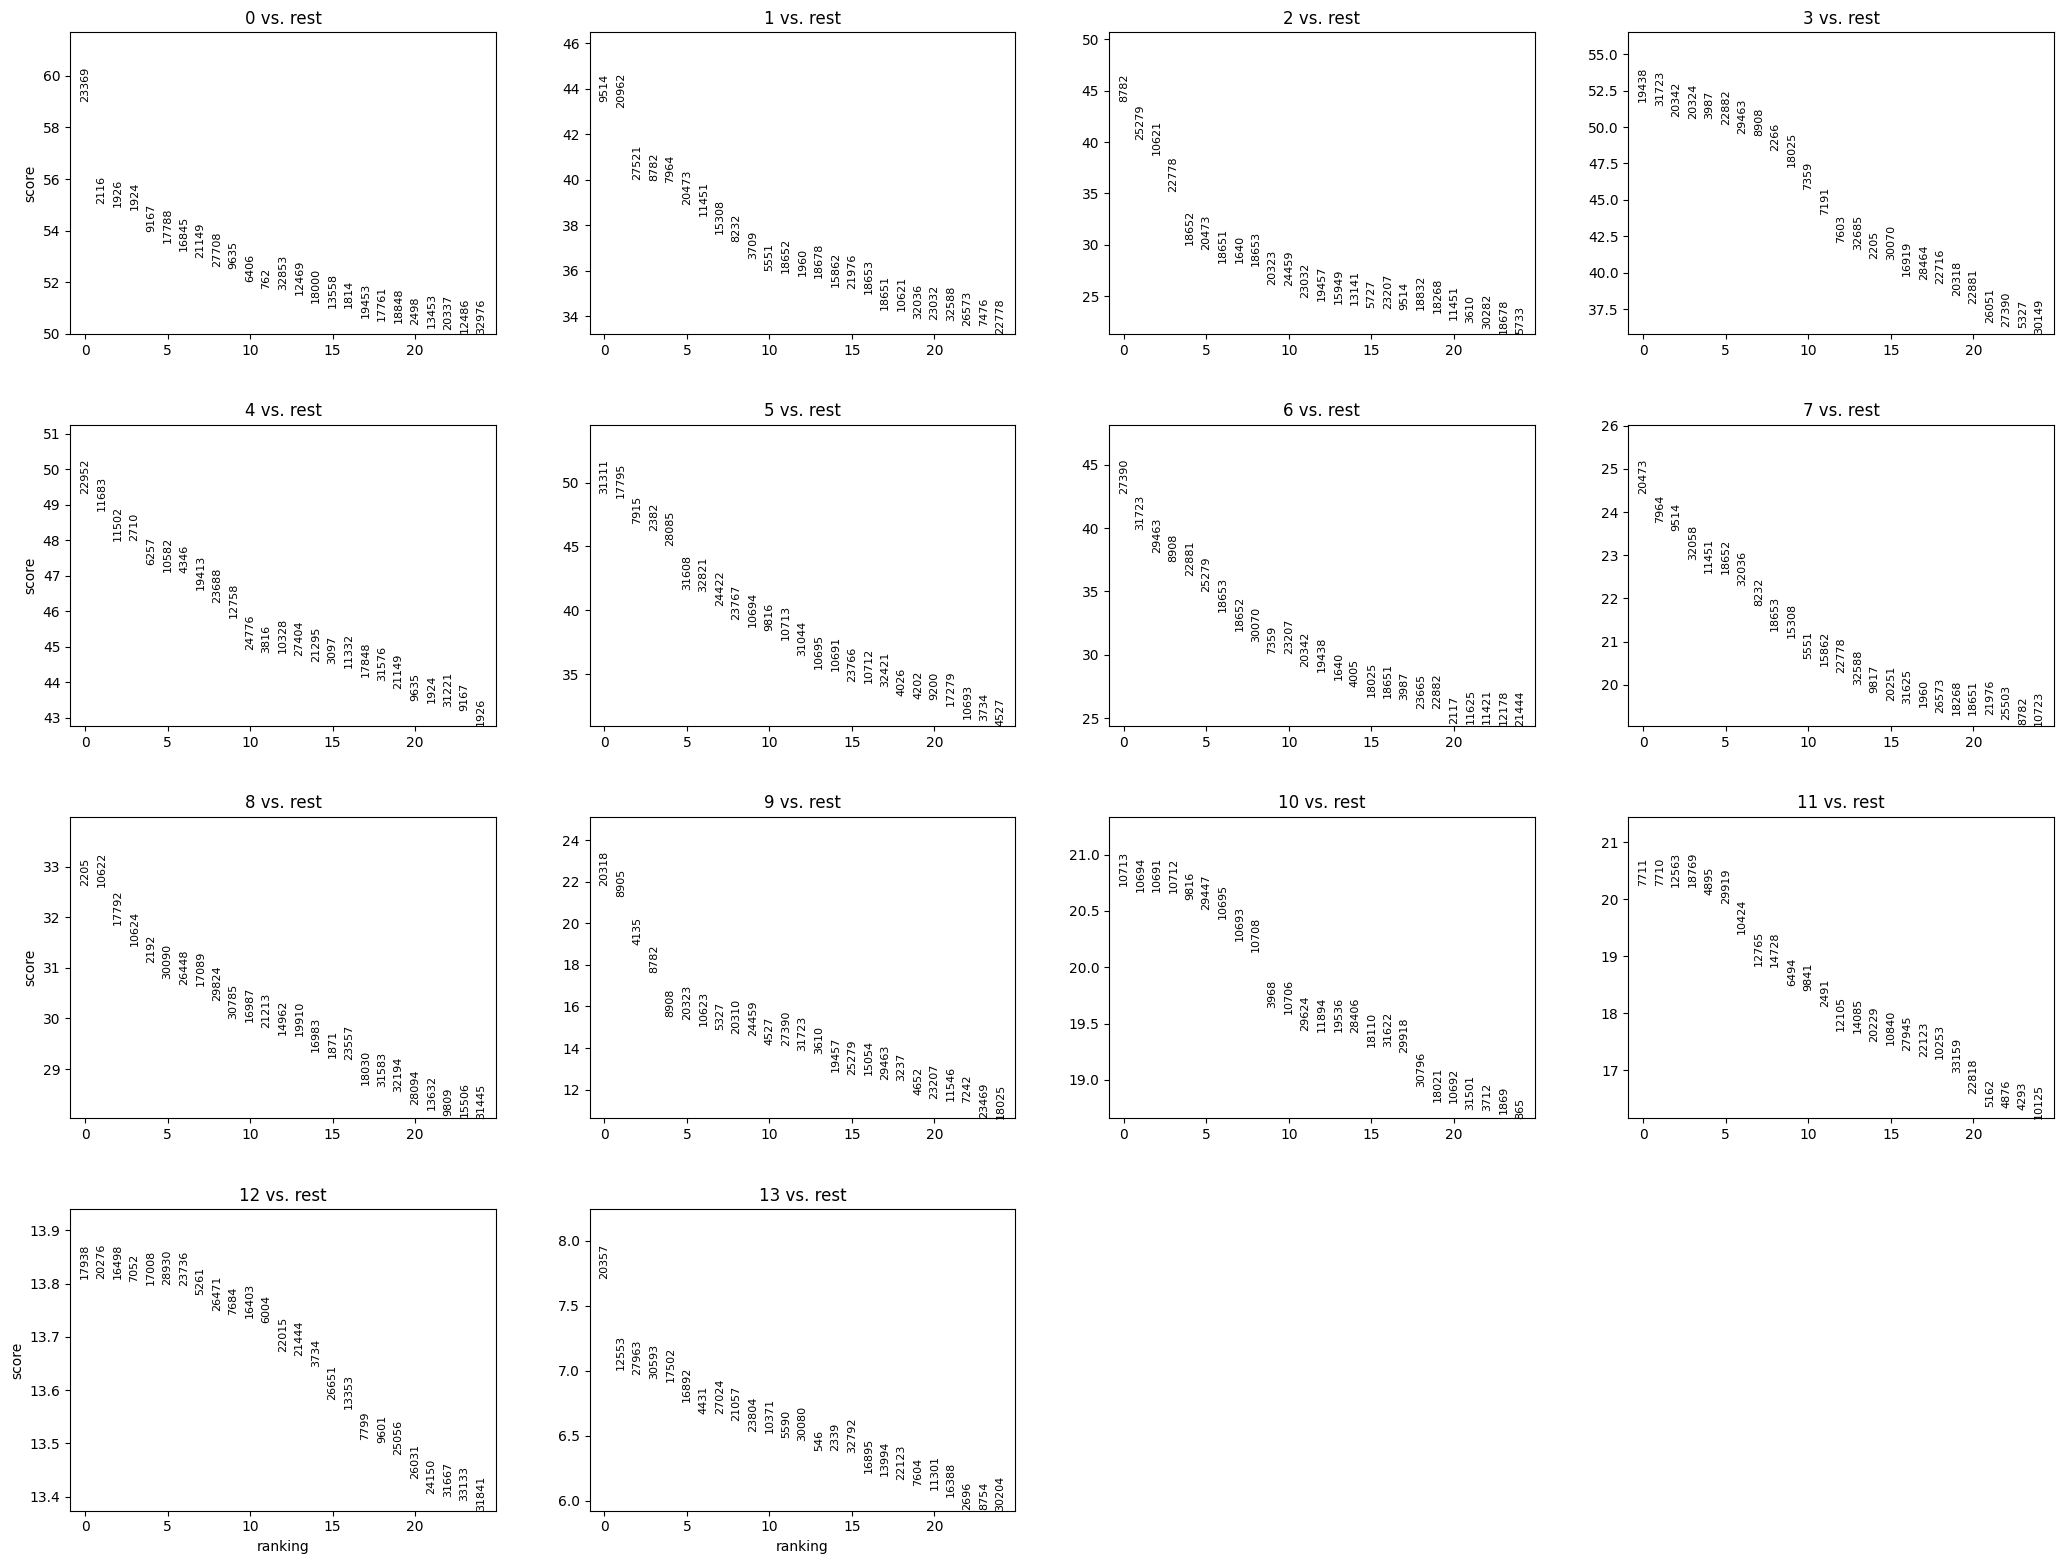

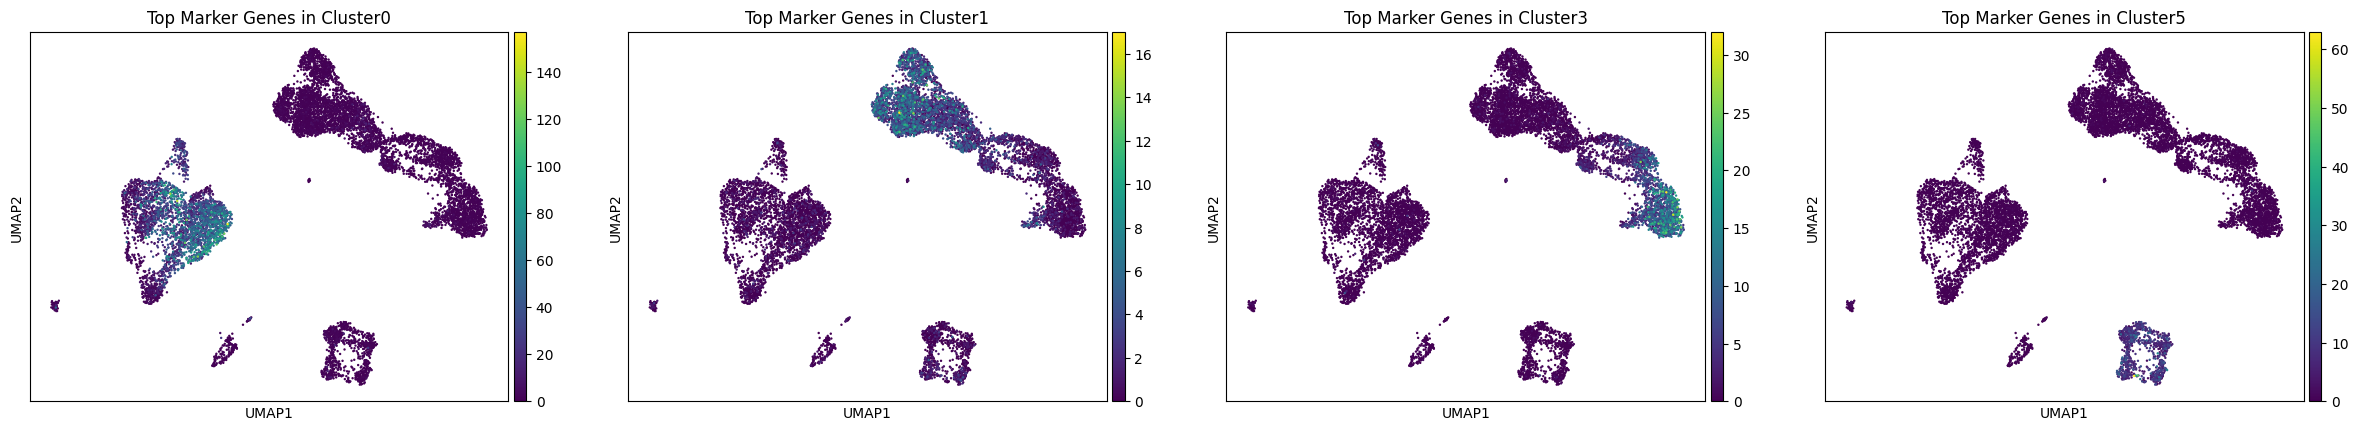

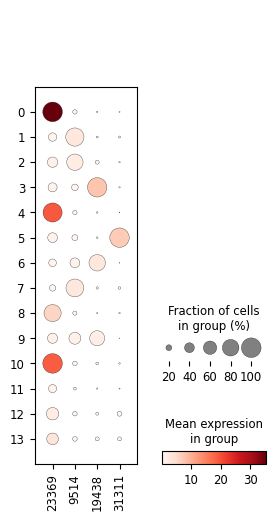

celltype.l1,B,CD4 T,CD8 T,DC,Mono,NK,other,other T
leiden,,,,,,,,
0,0,0,0,2,1643,0,18,0
1,0,1130,473,0,0,0,4,30
2,0,938,240,0,0,1,6,37
3,2,0,0,0,0,1123,0,16
4,0,0,0,5,952,0,1,0
5,918,0,0,0,0,0,0,0
6,0,97,613,0,0,26,1,146
7,0,371,226,0,1,0,1,17
8,0,0,0,0,363,0,21,0


In [ ]:
import scanpy as sc
import pandas as pd

adata = sc.read_h5ad('adata_harmony_corrected.h5ad')

#clustering with Leiden
for resolution in [0.3, 0.5, 1.0]:
    sc.tl.leiden(adata, resolution=resolution)
    sc.pl.umap(adata, color=['leiden'], title=f'Leiden Clustering (resolution={resolution})')

sc.tl.leiden(adata, resolution=0.5)
sc.pl.umap(adata, color=['leiden'], title='Leiden Clustering (resolution=0.5)')

print(adata.obs['leiden'].value_counts())

#identify marker genes for each cluster
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon') #wilcoxon method
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, title='Marker Genes per Cluster')

#visualize top marker genes
sc.pl.umap(adata, color=['23369', '9514','19438','31311'],title=['Top Marker Genes in Cluster0','Top Marker Genes in Cluster1','Top Marker Genes in Cluster3','Top Marker Genes in Cluster5'])
sc.pl.dotplot(adata, var_names=['23369', '9514','19438','31311'], groupby='leiden')

#Compare clusters with known cell types
pd.crosstab(adata.obs['leiden'], adata.obs['celltype.l1'])